In [ ]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras import Model, layers
import numpy as np
from tensorflow.keras.datasets import mnist

In [ ]:
num_classes = 10  
num_features = 784  

In [ ]:
learning_rate = 0.1
training_steps = 2000
batch_size = 256
display_step = 100

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])
x_train, x_test = x_train / 255., x_test / 255.
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [ ]:
# Cross-Entropy Loss.
def cross_entropy_loss(x, y):
    y = tf.cast(y, tf.int64)
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=x)
    return tf.reduce_mean(loss)

# Tweaking the number of layers


## one layer

In [ ]:
n_hidden = 128

### Stochastic Gradient Descent

step: 100, loss: 0.491553, accuracy: 0.871094
step: 200, loss: 0.323363, accuracy: 0.906250
step: 300, loss: 0.293849, accuracy: 0.929688
step: 400, loss: 0.278702, accuracy: 0.917969
step: 500, loss: 0.326261, accuracy: 0.906250
step: 600, loss: 0.232192, accuracy: 0.921875
step: 700, loss: 0.171193, accuracy: 0.957031
step: 800, loss: 0.224906, accuracy: 0.937500
step: 900, loss: 0.199541, accuracy: 0.957031
step: 1000, loss: 0.167429, accuracy: 0.964844
step: 1100, loss: 0.226844, accuracy: 0.941406
step: 1200, loss: 0.145323, accuracy: 0.960938
step: 1300, loss: 0.273976, accuracy: 0.910156
step: 1400, loss: 0.129406, accuracy: 0.984375
step: 1500, loss: 0.209983, accuracy: 0.945312
step: 1600, loss: 0.166266, accuracy: 0.953125
step: 1700, loss: 0.109943, accuracy: 0.964844
step: 1800, loss: 0.131730, accuracy: 0.960938
step: 1900, loss: 0.188938, accuracy: 0.957031
step: 2000, loss: 0.136948, accuracy: 0.957031
Test Accuracy: 0.956000


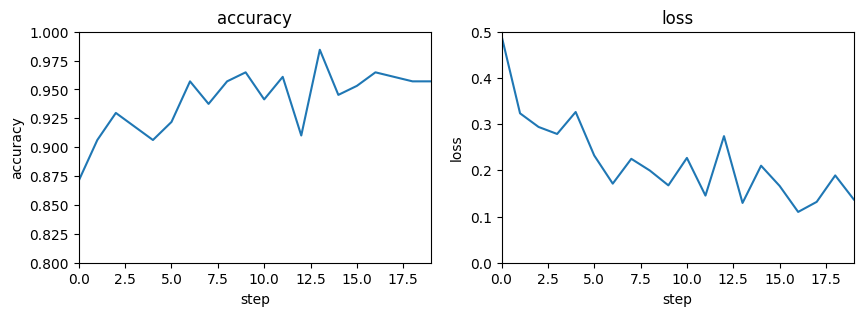

In [ ]:
class NeuralNet(Model):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = layers.Dense(n_hidden, activation=tf.nn.relu)
        self.out = layers.Dense(num_classes)

    def call(self, x, is_training=False):
        x = self.fc1(x)
        x = self.out(x)
        if not is_training:
            x = tf.nn.softmax(x)
        return x

neural_net = NeuralNet()

# Optimization process.
def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = neural_net(x, is_training=True)
        loss = cross_entropy_loss(pred, y)
        trainable_variables = neural_net.trainable_variables
        gradients = g.gradient(loss, trainable_variables)
        optimizer.apply_gradients(zip(gradients, trainable_variables))


# Accuracy metric.
def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)


optimizer = tf.keras.optimizers.SGD(learning_rate)
acc_arr = np.zeros(20)
loss_arr = np.zeros(20)

i=0
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    run_optimization(batch_x, batch_y)
    if step % display_step == 0:
        pred = neural_net(batch_x, is_training=True)
        loss = cross_entropy_loss(pred, batch_y)
        acc = accuracy(pred, batch_y)
        acc_arr[i] = acc.numpy()
        loss_arr[i] = loss.numpy()
        i+=1
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

pred = neural_net(x_test, is_training=False)
print("Test Accuracy: %f" % accuracy(pred, y_test))

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(acc_arr)
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('step')
plt.xlim([0,19])
plt.ylim([0.8,1])

plt.subplot(1,2,2)
plt.plot(loss_arr)
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('step')
plt.xlim([0,19])
plt.ylim([0,0.5])
plt.show()

plt.show()

### Adagrad

step: 100, loss: 0.251680, accuracy: 0.937500
step: 200, loss: 0.258796, accuracy: 0.917969
step: 300, loss: 0.204945, accuracy: 0.933594
step: 400, loss: 0.219269, accuracy: 0.933594
step: 500, loss: 0.115690, accuracy: 0.968750
step: 600, loss: 0.108834, accuracy: 0.976562
step: 700, loss: 0.076014, accuracy: 0.988281
step: 800, loss: 0.156099, accuracy: 0.957031
step: 900, loss: 0.119220, accuracy: 0.964844
step: 1000, loss: 0.069703, accuracy: 0.984375
step: 1100, loss: 0.120376, accuracy: 0.964844
step: 1200, loss: 0.070975, accuracy: 0.980469
step: 1300, loss: 0.085665, accuracy: 0.988281
step: 1400, loss: 0.070989, accuracy: 0.980469
step: 1500, loss: 0.081961, accuracy: 0.984375
step: 1600, loss: 0.060665, accuracy: 0.984375
step: 1700, loss: 0.058882, accuracy: 0.984375
step: 1800, loss: 0.081319, accuracy: 0.968750
step: 1900, loss: 0.063151, accuracy: 0.980469
step: 2000, loss: 0.071221, accuracy: 0.984375
Test Accuracy: 0.972700


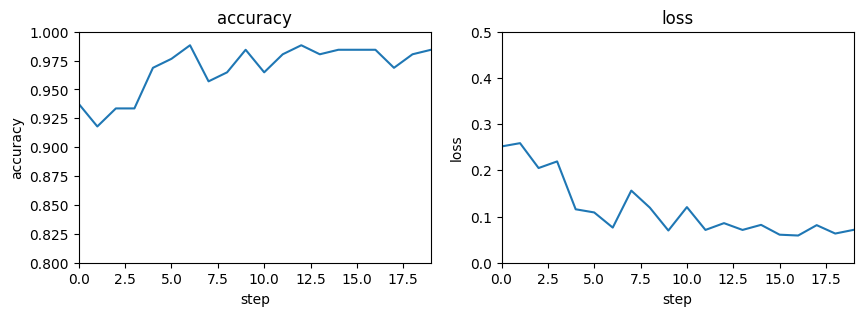

In [ ]:
class NeuralNet(Model):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = layers.Dense(n_hidden, activation=tf.nn.relu)
        self.out = layers.Dense(num_classes)

    def call(self, x, is_training=False):
        x = self.fc1(x)
        x = self.out(x)
        if not is_training:
            x = tf.nn.softmax(x)
        return x

neural_net = NeuralNet()

# Optimization process.
def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = neural_net(x, is_training=True)
        loss = cross_entropy_loss(pred, y)
        trainable_variables = neural_net.trainable_variables
        gradients = g.gradient(loss, trainable_variables)
        optimizer.apply_gradients(zip(gradients, trainable_variables))


# Accuracy metric.
def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)

optimizer = tf.keras.optimizers.Adagrad(learning_rate)
acc_arr = np.zeros(20)
loss_arr = np.zeros(20)

i=0
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    run_optimization(batch_x, batch_y)
    if step % display_step == 0:
        pred = neural_net(batch_x, is_training=True)
        loss = cross_entropy_loss(pred, batch_y)
        acc = accuracy(pred, batch_y)
        acc_arr[i] = acc.numpy()
        loss_arr[i] = loss.numpy()
        i+=1
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))
        
pred = neural_net(x_test, is_training=False)
print("Test Accuracy: %f" % accuracy(pred, y_test))

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(acc_arr)
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('step')
plt.xlim([0,19])
plt.ylim([0.8,1])

plt.subplot(1,2,2)
plt.plot(loss_arr)
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('step')
plt.xlim([0,19])
plt.ylim([0,0.5])
plt.show()

plt.show()

### Adam

step: 100, loss: 0.348304, accuracy: 0.898438
step: 200, loss: 0.337229, accuracy: 0.910156
step: 300, loss: 0.299141, accuracy: 0.925781
step: 400, loss: 0.263135, accuracy: 0.917969
step: 500, loss: 0.385033, accuracy: 0.894531
step: 600, loss: 0.187665, accuracy: 0.941406
step: 700, loss: 0.279007, accuracy: 0.933594
step: 800, loss: 0.337728, accuracy: 0.917969
step: 900, loss: 0.328378, accuracy: 0.917969
step: 1000, loss: 0.193928, accuracy: 0.949219
step: 1100, loss: 0.228752, accuracy: 0.937500
step: 1200, loss: 0.217873, accuracy: 0.937500
step: 1300, loss: 0.433314, accuracy: 0.890625
step: 1400, loss: 0.275053, accuracy: 0.929688
step: 1500, loss: 0.217870, accuracy: 0.953125
step: 1600, loss: 0.289983, accuracy: 0.917969
step: 1700, loss: 0.172158, accuracy: 0.949219
step: 1800, loss: 0.220926, accuracy: 0.933594
step: 1900, loss: 0.159741, accuracy: 0.949219
step: 2000, loss: 0.281377, accuracy: 0.917969
Test Accuracy: 0.907400


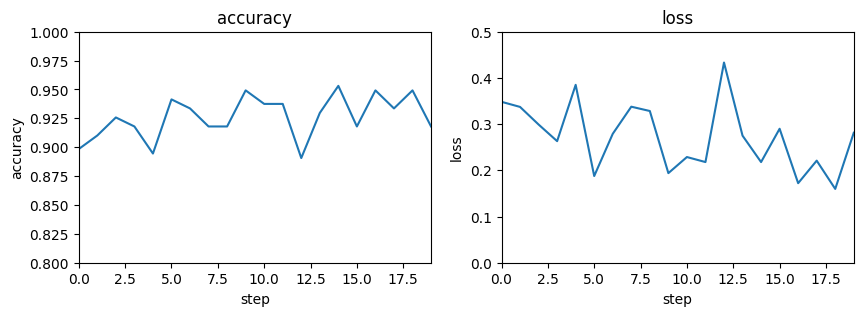

In [ ]:
class NeuralNet(Model):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = layers.Dense(n_hidden, activation=tf.nn.relu)
        self.out = layers.Dense(num_classes)

    def call(self, x, is_training=False):
        x = self.fc1(x)
        x = self.out(x)
        if not is_training:
            x = tf.nn.softmax(x)
        return x

neural_net = NeuralNet()

# Optimization process.
def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = neural_net(x, is_training=True)
        loss = cross_entropy_loss(pred, y)
        trainable_variables = neural_net.trainable_variables
        gradients = g.gradient(loss, trainable_variables)
        optimizer.apply_gradients(zip(gradients, trainable_variables))


# Accuracy metric.
def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)

    
optimizer = tf.keras.optimizers.Adam(learning_rate)
acc_arr = np.zeros(20)
loss_arr = np.zeros(20)

i=0
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    run_optimization(batch_x, batch_y)
    if step % display_step == 0:
        pred = neural_net(batch_x, is_training=True)
        loss = cross_entropy_loss(pred, batch_y)
        acc = accuracy(pred, batch_y)
        acc_arr[i] = acc.numpy()
        loss_arr[i] = loss.numpy()
        i+=1
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

pred = neural_net(x_test, is_training=False)
print("Test Accuracy: %f" % accuracy(pred, y_test))

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(acc_arr)
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('step')
plt.xlim([0,19])
plt.ylim([0.8,1])

plt.subplot(1,2,2)
plt.plot(loss_arr)
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('step')
plt.xlim([0,19])
plt.ylim([0,0.5])
plt.show()

plt.show()

## two layers

In [ ]:
n_hidden = [128, 256]

### Stochastic Gradient Descent

step: 100, loss: 0.433802, accuracy: 0.878906
step: 200, loss: 0.320218, accuracy: 0.886719
step: 300, loss: 0.264224, accuracy: 0.937500
step: 400, loss: 0.211474, accuracy: 0.941406
step: 500, loss: 0.223259, accuracy: 0.933594
step: 600, loss: 0.232340, accuracy: 0.929688
step: 700, loss: 0.184603, accuracy: 0.937500
step: 800, loss: 0.233565, accuracy: 0.945312
step: 900, loss: 0.206403, accuracy: 0.929688
step: 1000, loss: 0.111015, accuracy: 0.957031
step: 1100, loss: 0.155554, accuracy: 0.957031
step: 1200, loss: 0.146798, accuracy: 0.941406
step: 1300, loss: 0.111419, accuracy: 0.957031
step: 1400, loss: 0.090704, accuracy: 0.980469
step: 1500, loss: 0.107970, accuracy: 0.968750
step: 1600, loss: 0.100225, accuracy: 0.976562
step: 1700, loss: 0.135400, accuracy: 0.949219
step: 1800, loss: 0.103381, accuracy: 0.968750
step: 1900, loss: 0.081996, accuracy: 0.972656
step: 2000, loss: 0.116043, accuracy: 0.976562
Test Accuracy: 0.964600


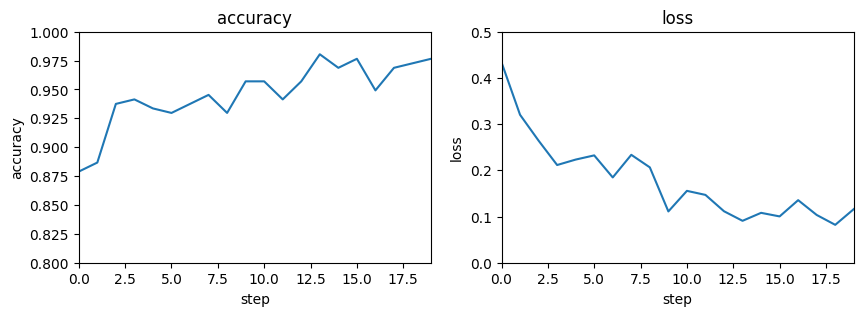

In [ ]:
class NeuralNet(Model):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = layers.Dense(n_hidden[0], activation=tf.nn.relu)
        self.fc2 = layers.Dense(n_hidden[1], activation=tf.nn.relu)
        self.out = layers.Dense(num_classes)

    def call(self, x, is_training=False):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.out(x)
        if not is_training:
            x = tf.nn.softmax(x)
        return x

neural_net = NeuralNet()

# Optimization process.
def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = neural_net(x, is_training=True)
        loss = cross_entropy_loss(pred, y)
        trainable_variables = neural_net.trainable_variables
        gradients = g.gradient(loss, trainable_variables)
        optimizer.apply_gradients(zip(gradients, trainable_variables))


# Accuracy metric.
def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)

optimizer = tf.keras.optimizers.SGD(learning_rate)
acc_arr = np.zeros(20)
loss_arr = np.zeros(20)

i=0
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    run_optimization(batch_x, batch_y)
    if step % display_step == 0:
        pred = neural_net(batch_x, is_training=True)
        loss = cross_entropy_loss(pred, batch_y)
        acc = accuracy(pred, batch_y)
        acc_arr[i] = acc.numpy()
        loss_arr[i] = loss.numpy()
        i+=1
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))


pred = neural_net(x_test, is_training=False)
print("Test Accuracy: %f" % accuracy(pred, y_test))

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(acc_arr)
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('step')
plt.xlim([0,19])
plt.ylim([0.8,1])

plt.subplot(1,2,2)
plt.plot(loss_arr)
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('step')
plt.xlim([0,19])
plt.ylim([0,0.5])
plt.show()

plt.show()

#### tweaking the learning rate for the best optimizer

In [ ]:
lr = 0.01

step: 100, loss: 0.050595, accuracy: 0.988281
step: 200, loss: 0.168154, accuracy: 0.972656
step: 300, loss: 0.076124, accuracy: 0.968750
step: 400, loss: 0.109936, accuracy: 0.968750
step: 500, loss: 0.061642, accuracy: 0.980469
step: 600, loss: 0.081090, accuracy: 0.980469
step: 700, loss: 0.084806, accuracy: 0.980469
step: 800, loss: 0.112583, accuracy: 0.960938
step: 900, loss: 0.112997, accuracy: 0.960938
step: 1000, loss: 0.060595, accuracy: 0.976562
step: 1100, loss: 0.126261, accuracy: 0.968750
step: 1200, loss: 0.062984, accuracy: 0.992188
step: 1300, loss: 0.125034, accuracy: 0.964844
step: 1400, loss: 0.048374, accuracy: 0.996094
step: 1500, loss: 0.070764, accuracy: 0.980469
step: 1600, loss: 0.078150, accuracy: 0.980469
step: 1700, loss: 0.130845, accuracy: 0.968750
step: 1800, loss: 0.093310, accuracy: 0.984375
step: 1900, loss: 0.060028, accuracy: 0.984375
step: 2000, loss: 0.110041, accuracy: 0.964844


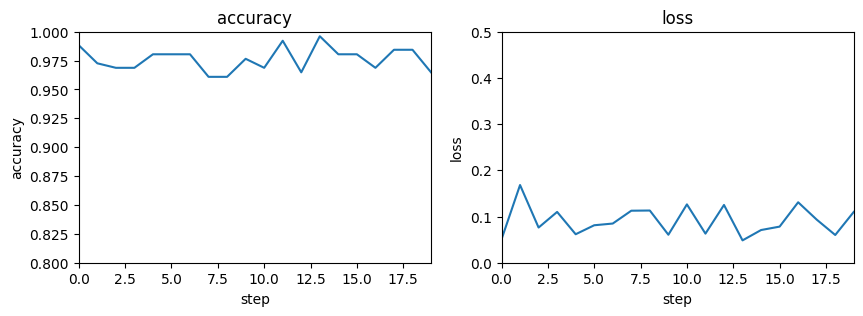

In [ ]:
optimizer = tf.keras.optimizers.SGD(lr)
acc_arr = np.zeros(20)
loss_arr = np.zeros(20)

i=0
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    run_optimization(batch_x, batch_y)
    if step % display_step == 0:
        pred = neural_net(batch_x, is_training=True)
        loss = cross_entropy_loss(pred, batch_y)
        acc = accuracy(pred, batch_y)
        acc_arr[i] = acc.numpy()
        loss_arr[i] = loss.numpy()
        i+=1
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(acc_arr)
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('step')
plt.xlim([0,19])
plt.ylim([0.8,1])

plt.subplot(1,2,2)
plt.plot(loss_arr)
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('step')
plt.xlim([0,19])
plt.ylim([0,0.5])
plt.show()

plt.show()

### Adagrad

step: 100, loss: 0.277219, accuracy: 0.906250
step: 200, loss: 0.147013, accuracy: 0.953125
step: 300, loss: 0.164415, accuracy: 0.957031
step: 400, loss: 0.144941, accuracy: 0.964844
step: 500, loss: 0.099826, accuracy: 0.976562
step: 600, loss: 0.093634, accuracy: 0.976562
step: 700, loss: 0.067037, accuracy: 0.988281
step: 800, loss: 0.038341, accuracy: 0.992188
step: 900, loss: 0.027821, accuracy: 1.000000
step: 1000, loss: 0.083013, accuracy: 0.976562
step: 1100, loss: 0.097412, accuracy: 0.972656
step: 1200, loss: 0.029204, accuracy: 0.996094
step: 1300, loss: 0.027312, accuracy: 0.996094
step: 1400, loss: 0.024054, accuracy: 1.000000
step: 1500, loss: 0.032994, accuracy: 0.992188
step: 1600, loss: 0.014432, accuracy: 1.000000
step: 1700, loss: 0.028829, accuracy: 0.992188
step: 1800, loss: 0.024851, accuracy: 0.996094
step: 1900, loss: 0.017946, accuracy: 0.996094
step: 2000, loss: 0.033395, accuracy: 0.992188
Test Accuracy: 0.973500


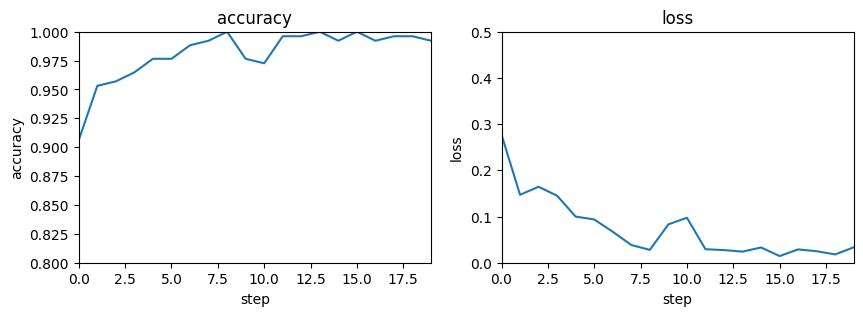

In [ ]:
class NeuralNet(Model):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = layers.Dense(n_hidden[0], activation=tf.nn.relu)
        self.fc2 = layers.Dense(n_hidden[1], activation=tf.nn.relu)
        self.out = layers.Dense(num_classes)

    def call(self, x, is_training=False):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.out(x)
        if not is_training:
            x = tf.nn.softmax(x)
        return x

neural_net = NeuralNet()

# Optimization process.
def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = neural_net(x, is_training=True)
        loss = cross_entropy_loss(pred, y)
        trainable_variables = neural_net.trainable_variables
        gradients = g.gradient(loss, trainable_variables)
        optimizer.apply_gradients(zip(gradients, trainable_variables))


# Accuracy metric.
def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)

optimizer = tf.keras.optimizers.Adagrad(learning_rate)
acc_arr = np.zeros(20)
loss_arr = np.zeros(20)

i=0
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    run_optimization(batch_x, batch_y)
    if step % display_step == 0:
        pred = neural_net(batch_x, is_training=True)
        loss = cross_entropy_loss(pred, batch_y)
        acc = accuracy(pred, batch_y)
        acc_arr[i] = acc.numpy()
        loss_arr[i] = loss.numpy()
        i+=1
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

pred = neural_net(x_test, is_training=False)
print("Test Accuracy: %f" % accuracy(pred, y_test))

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(acc_arr)
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('step')
plt.xlim([0,19])
plt.ylim([0.8,1])

plt.subplot(1,2,2)
plt.plot(loss_arr)
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('step')
plt.xlim([0,19])
plt.ylim([0,0.5])
plt.show()

plt.show()

### Adam

step: 100, loss: 1.645897, accuracy: 0.378906
step: 200, loss: 1.696455, accuracy: 0.347656
step: 300, loss: 1.680345, accuracy: 0.375000
step: 400, loss: 1.434466, accuracy: 0.460938
step: 500, loss: 1.380223, accuracy: 0.406250
step: 600, loss: 1.349519, accuracy: 0.414062
step: 700, loss: 1.336721, accuracy: 0.476562
step: 800, loss: 1.980124, accuracy: 0.496094
step: 900, loss: 1.066133, accuracy: 0.507812
step: 1000, loss: 1.119841, accuracy: 0.550781
step: 1100, loss: 1.205639, accuracy: 0.531250
step: 1200, loss: 1.192199, accuracy: 0.519531
step: 1300, loss: 1.281044, accuracy: 0.480469
step: 1400, loss: 1.181343, accuracy: 0.507812
step: 1500, loss: 1.353595, accuracy: 0.519531
step: 1600, loss: 1.180178, accuracy: 0.519531
step: 1700, loss: 1.209195, accuracy: 0.535156
step: 1800, loss: 1.184482, accuracy: 0.550781
step: 1900, loss: 1.085088, accuracy: 0.570312
step: 2000, loss: 1.262807, accuracy: 0.500000
Test Accuracy: 0.499100


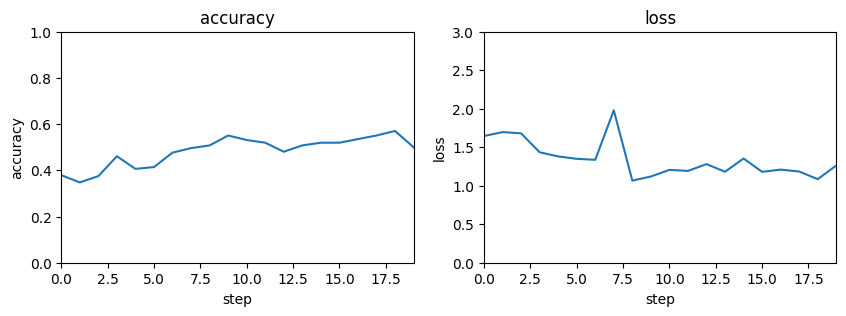

In [ ]:
class NeuralNet(Model):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = layers.Dense(n_hidden[0], activation=tf.nn.relu)
        self.fc2 = layers.Dense(n_hidden[1], activation=tf.nn.relu)
        self.out = layers.Dense(num_classes)

    def call(self, x, is_training=False):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.out(x)
        if not is_training:
            x = tf.nn.softmax(x)
        return x
neural_net = NeuralNet()

# Optimization process.
def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = neural_net(x, is_training=True)
        loss = cross_entropy_loss(pred, y)
        trainable_variables = neural_net.trainable_variables
        gradients = g.gradient(loss, trainable_variables)
        optimizer.apply_gradients(zip(gradients, trainable_variables))


# Accuracy metric.
def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)

optimizer = tf.keras.optimizers.Adam(learning_rate)
acc_arr = np.zeros(20)
loss_arr = np.zeros(20)

i=0
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    run_optimization(batch_x, batch_y)
    if step % display_step == 0:
        pred = neural_net(batch_x, is_training=True)
        loss = cross_entropy_loss(pred, batch_y)
        acc = accuracy(pred, batch_y)
        acc_arr[i] = acc.numpy()
        loss_arr[i] = loss.numpy()
        i+=1
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

pred = neural_net(x_test, is_training=False)
print("Test Accuracy: %f" % accuracy(pred, y_test))

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(acc_arr)
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('step')
plt.xlim([0,19])
plt.ylim([0,1])

plt.subplot(1,2,2)
plt.plot(loss_arr)
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('step')
plt.xlim([0,19])
plt.ylim([0,3])
plt.show()

plt.show()

## three layers

In [ ]:
n_hidden = [128, 256, 128]

### Stochastic Gradient Descent

step: 100, loss: 0.458274, accuracy: 0.871094
step: 200, loss: 0.377539, accuracy: 0.890625
step: 300, loss: 0.291139, accuracy: 0.929688
step: 400, loss: 0.266136, accuracy: 0.917969
step: 500, loss: 0.154324, accuracy: 0.953125
step: 600, loss: 0.195705, accuracy: 0.960938
step: 700, loss: 0.083278, accuracy: 0.980469
step: 800, loss: 0.143863, accuracy: 0.957031
step: 900, loss: 0.121461, accuracy: 0.968750
step: 1000, loss: 0.077789, accuracy: 0.980469
step: 1100, loss: 0.113174, accuracy: 0.980469
step: 1200, loss: 0.101456, accuracy: 0.964844
step: 1300, loss: 0.074955, accuracy: 0.980469
step: 1400, loss: 0.085243, accuracy: 0.980469
step: 1500, loss: 0.117075, accuracy: 0.972656
step: 1600, loss: 0.059411, accuracy: 0.980469
step: 1700, loss: 0.033076, accuracy: 0.996094
step: 1800, loss: 0.052546, accuracy: 0.992188
step: 1900, loss: 0.025220, accuracy: 0.996094
step: 2000, loss: 0.077636, accuracy: 0.984375
Test Accuracy: 0.969200


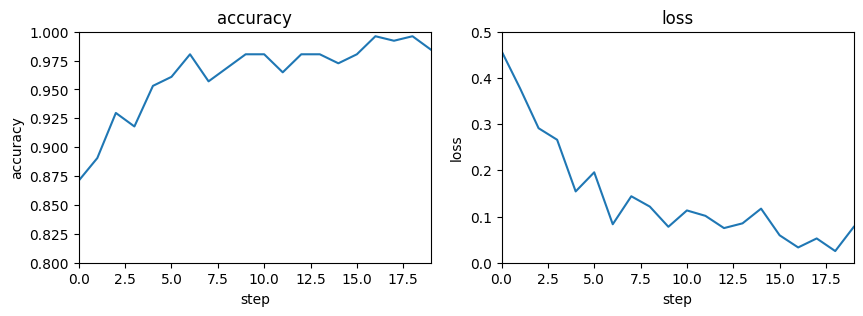

In [ ]:
class NeuralNet(Model):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = layers.Dense(n_hidden[0], activation=tf.nn.relu)
        self.fc2 = layers.Dense(n_hidden[1], activation=tf.nn.relu)
        self.fc3 = layers.Dense(n_hidden[2], activation=tf.nn.relu)
        self.out = layers.Dense(num_classes)

    def call(self, x, is_training=False):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.out(x)
        if not is_training:
            x = tf.nn.softmax(x)
        return x

neural_net = NeuralNet()

# Optimization process.
def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = neural_net(x, is_training=True)
        loss = cross_entropy_loss(pred, y)
        trainable_variables = neural_net.trainable_variables
        gradients = g.gradient(loss, trainable_variables)
        optimizer.apply_gradients(zip(gradients, trainable_variables))


# Accuracy metric.
def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)


optimizer = tf.keras.optimizers.SGD(learning_rate)
acc_arr = np.zeros(20)
loss_arr = np.zeros(20)

i=0
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    run_optimization(batch_x, batch_y)
    if step % display_step == 0:
        pred = neural_net(batch_x, is_training=True)
        loss = cross_entropy_loss(pred, batch_y)
        acc = accuracy(pred, batch_y)
        acc_arr[i] = acc.numpy()
        loss_arr[i] = loss.numpy()
        i+=1
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

pred = neural_net(x_test, is_training=False)
print("Test Accuracy: %f" % accuracy(pred, y_test))

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(acc_arr)
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('step')
plt.xlim([0,19])
plt.ylim([0.8,1])

plt.subplot(1,2,2)
plt.plot(loss_arr)
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('step')
plt.xlim([0,19])
plt.ylim([0,0.5])
plt.show()

plt.show()

### Adagrad

step: 100, loss: 0.232066, accuracy: 0.921875
step: 200, loss: 0.151671, accuracy: 0.968750
step: 300, loss: 0.104601, accuracy: 0.984375
step: 400, loss: 0.059935, accuracy: 0.976562
step: 500, loss: 0.090208, accuracy: 0.972656
step: 600, loss: 0.065314, accuracy: 0.980469
step: 700, loss: 0.035264, accuracy: 0.996094
step: 800, loss: 0.092288, accuracy: 0.980469
step: 900, loss: 0.041501, accuracy: 0.988281
step: 1000, loss: 0.033201, accuracy: 0.996094
step: 1100, loss: 0.043849, accuracy: 0.988281
step: 1200, loss: 0.025464, accuracy: 0.996094
step: 1300, loss: 0.014599, accuracy: 1.000000
step: 1400, loss: 0.010240, accuracy: 1.000000
step: 1500, loss: 0.015532, accuracy: 0.996094
step: 1600, loss: 0.013608, accuracy: 0.996094
step: 1700, loss: 0.010182, accuracy: 1.000000
step: 1800, loss: 0.017960, accuracy: 0.992188
step: 1900, loss: 0.006576, accuracy: 1.000000
step: 2000, loss: 0.011760, accuracy: 1.000000
Test Accuracy: 0.976500


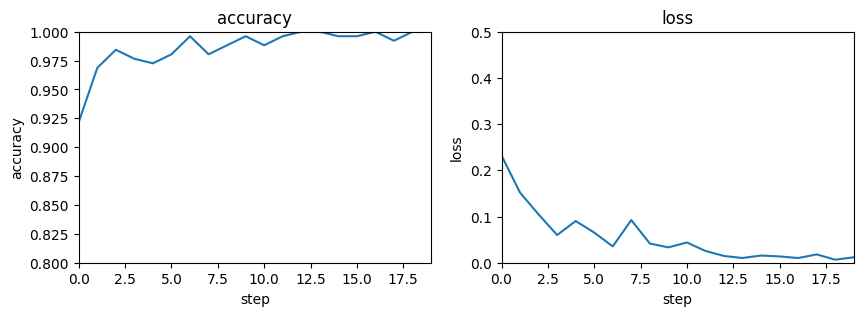

In [ ]:
class NeuralNet(Model):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = layers.Dense(n_hidden[0], activation=tf.nn.relu)
        self.fc2 = layers.Dense(n_hidden[1], activation=tf.nn.relu)
        self.fc3 = layers.Dense(n_hidden[2], activation=tf.nn.relu)
        self.out = layers.Dense(num_classes)

    def call(self, x, is_training=False):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.out(x)
        if not is_training:
            x = tf.nn.softmax(x)
        return x

neural_net = NeuralNet()

# Optimization process.
def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = neural_net(x, is_training=True)
        loss = cross_entropy_loss(pred, y)
        trainable_variables = neural_net.trainable_variables
        gradients = g.gradient(loss, trainable_variables)
        optimizer.apply_gradients(zip(gradients, trainable_variables))


# Accuracy metric.
def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)

optimizer = tf.keras.optimizers.Adagrad(learning_rate)
acc_arr = np.zeros(20)
loss_arr = np.zeros(20)

i=0
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    run_optimization(batch_x, batch_y)
    if step % display_step == 0:
        pred = neural_net(batch_x, is_training=True)
        loss = cross_entropy_loss(pred, batch_y)
        acc = accuracy(pred, batch_y)
        acc_arr[i] = acc.numpy()
        loss_arr[i] = loss.numpy()
        i+=1
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))


pred = neural_net(x_test, is_training=False)
print("Test Accuracy: %f" % accuracy(pred, y_test))

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(acc_arr)
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('step')
plt.xlim([0,19])
plt.ylim([0.8,1])

plt.subplot(1,2,2)
plt.plot(loss_arr)
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('step')
plt.xlim([0,19])
plt.ylim([0,0.5])
plt.show()

plt.show()

### Adam

step: 100, loss: 2.300364, accuracy: 0.121094
step: 200, loss: 2.308171, accuracy: 0.085938
step: 300, loss: 2.304800, accuracy: 0.093750
step: 400, loss: 2.303244, accuracy: 0.089844
step: 500, loss: 2.309480, accuracy: 0.093750
step: 600, loss: 2.302742, accuracy: 0.101562
step: 700, loss: 2.297494, accuracy: 0.097656
step: 800, loss: 2.322541, accuracy: 0.117188
step: 900, loss: 2.300550, accuracy: 0.117188
step: 1000, loss: 2.303964, accuracy: 0.128906
step: 1100, loss: 2.310689, accuracy: 0.089844
step: 1200, loss: 2.302658, accuracy: 0.121094
step: 1300, loss: 2.314734, accuracy: 0.101562
step: 1400, loss: 2.302146, accuracy: 0.089844
step: 1500, loss: 2.300163, accuracy: 0.105469
step: 1600, loss: 2.305157, accuracy: 0.105469
step: 1700, loss: 2.292495, accuracy: 0.132812
step: 1800, loss: 2.302892, accuracy: 0.109375
step: 1900, loss: 2.310505, accuracy: 0.082031
step: 2000, loss: 2.313346, accuracy: 0.097656
Test Accuracy: 0.113500


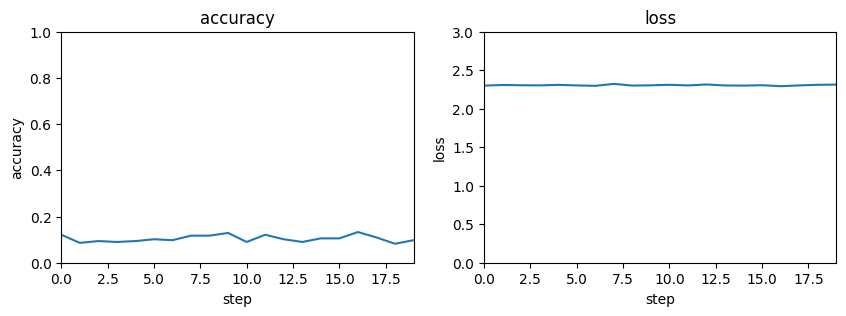

In [ ]:
class NeuralNet(Model):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = layers.Dense(n_hidden[0], activation=tf.nn.relu)
        self.fc2 = layers.Dense(n_hidden[1], activation=tf.nn.relu)
        self.fc3 = layers.Dense(n_hidden[2], activation=tf.nn.relu)
        self.out = layers.Dense(num_classes)

    def call(self, x, is_training=False):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.out(x)
        if not is_training:
            x = tf.nn.softmax(x)
        return x


neural_net = NeuralNet()

# Optimization process.
def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = neural_net(x, is_training=True)
        loss = cross_entropy_loss(pred, y)
        trainable_variables = neural_net.trainable_variables
        gradients = g.gradient(loss, trainable_variables)
        optimizer.apply_gradients(zip(gradients, trainable_variables))


# Accuracy metric.
def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)

optimizer = tf.keras.optimizers.Adam(learning_rate)
acc_arr = np.zeros(20)
loss_arr = np.zeros(20)

i=0
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    run_optimization(batch_x, batch_y)
    if step % display_step == 0:
        pred = neural_net(batch_x, is_training=True)
        loss = cross_entropy_loss(pred, batch_y)
        acc = accuracy(pred, batch_y)
        acc_arr[i] = acc.numpy()
        loss_arr[i] = loss.numpy()
        i+=1
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

pred = neural_net(x_test, is_training=False)
print("Test Accuracy: %f" % accuracy(pred, y_test))

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(acc_arr)
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('step')
plt.xlim([0,19])
plt.ylim([0,1])

plt.subplot(1,2,2)
plt.plot(loss_arr)
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('step')
plt.xlim([0,19])
plt.ylim([0,3])
plt.show()

plt.show()

#Tweaking the number of nodes

## 64, 128, 64

In [ ]:
n_hidden = [64, 128, 64]

### Stochastic Gradient Descent

step: 100, loss: 0.416044, accuracy: 0.871094
step: 200, loss: 0.271939, accuracy: 0.917969
step: 300, loss: 0.178167, accuracy: 0.964844
step: 400, loss: 0.237854, accuracy: 0.917969
step: 500, loss: 0.230487, accuracy: 0.937500
step: 600, loss: 0.125433, accuracy: 0.972656
step: 700, loss: 0.149798, accuracy: 0.960938
step: 800, loss: 0.160369, accuracy: 0.960938
step: 900, loss: 0.145801, accuracy: 0.960938
step: 1000, loss: 0.117343, accuracy: 0.980469
step: 1100, loss: 0.118339, accuracy: 0.976562
step: 1200, loss: 0.071093, accuracy: 0.980469
step: 1300, loss: 0.088829, accuracy: 0.988281
step: 1400, loss: 0.041802, accuracy: 0.988281
step: 1500, loss: 0.111235, accuracy: 0.968750
step: 1600, loss: 0.078995, accuracy: 0.984375
step: 1700, loss: 0.053992, accuracy: 0.992188
step: 1800, loss: 0.080515, accuracy: 0.984375
step: 1900, loss: 0.068580, accuracy: 0.984375
step: 2000, loss: 0.048650, accuracy: 0.992188
Test Accuracy: 0.965300


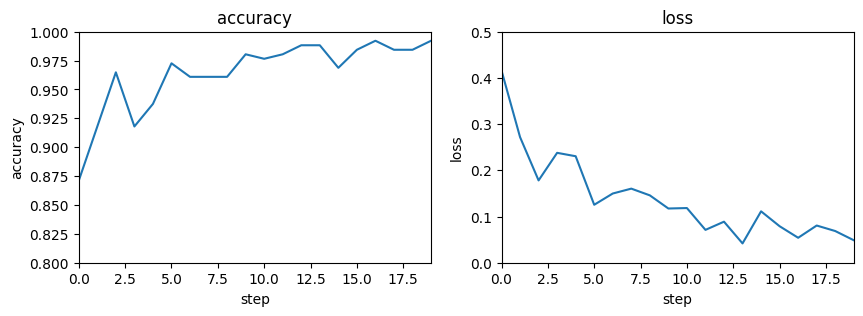

In [ ]:
class NeuralNet(Model):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = layers.Dense(n_hidden[0], activation=tf.nn.relu)
        self.fc2 = layers.Dense(n_hidden[1], activation=tf.nn.relu)
        self.fc3 = layers.Dense(n_hidden[2], activation=tf.nn.relu)
        self.out = layers.Dense(num_classes)

    def call(self, x, is_training=False):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.out(x)
        if not is_training:
            x = tf.nn.softmax(x)
        return x

neural_net = NeuralNet()

# Optimization process.
def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = neural_net(x, is_training=True)
        loss = cross_entropy_loss(pred, y)
        trainable_variables = neural_net.trainable_variables
        gradients = g.gradient(loss, trainable_variables)
        optimizer.apply_gradients(zip(gradients, trainable_variables))


# Accuracy metric.
def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)

optimizer = tf.keras.optimizers.SGD(learning_rate)
acc_arr = np.zeros(20)
loss_arr = np.zeros(20)

i=0
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    run_optimization(batch_x, batch_y)
    if step % display_step == 0:
        pred = neural_net(batch_x, is_training=True)
        loss = cross_entropy_loss(pred, batch_y)
        acc = accuracy(pred, batch_y)
        acc_arr[i] = acc.numpy()
        loss_arr[i] = loss.numpy()
        i+=1
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

pred = neural_net(x_test, is_training=False)
print("Test Accuracy: %f" % accuracy(pred, y_test))


plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(acc_arr)
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('step')
plt.xlim([0,19])
plt.ylim([0.8,1])

plt.subplot(1,2,2)
plt.plot(loss_arr)
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('step')
plt.xlim([0,19])
plt.ylim([0,0.5])
plt.show()

plt.show()

In [ ]:
neural_net.summary()

Model: "neural_net_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_82 (Dense)            multiple                  50240     
                                                                 
 dense_83 (Dense)            multiple                  8320      
                                                                 
 dense_84 (Dense)            multiple                  8256      
                                                                 
 dense_85 (Dense)            multiple                  650       
                                                                 
Total params: 67,466
Trainable params: 67,466
Non-trainable params: 0
_________________________________________________________________


### Adagrad

step: 100, loss: 0.252487, accuracy: 0.937500
step: 200, loss: 0.175169, accuracy: 0.945312
step: 300, loss: 0.095330, accuracy: 0.976562
step: 400, loss: 0.108523, accuracy: 0.976562
step: 500, loss: 0.090735, accuracy: 0.988281
step: 600, loss: 0.053561, accuracy: 0.992188
step: 700, loss: 0.016973, accuracy: 1.000000
step: 800, loss: 0.059099, accuracy: 0.988281
step: 900, loss: 0.048748, accuracy: 0.984375
step: 1000, loss: 0.061735, accuracy: 0.980469
step: 1100, loss: 0.074136, accuracy: 0.976562
step: 1200, loss: 0.034166, accuracy: 0.988281
step: 1300, loss: 0.011726, accuracy: 1.000000
step: 1400, loss: 0.023230, accuracy: 1.000000
step: 1500, loss: 0.036955, accuracy: 0.996094
step: 1600, loss: 0.029261, accuracy: 0.988281
step: 1700, loss: 0.020384, accuracy: 0.996094
step: 1800, loss: 0.021644, accuracy: 0.992188
step: 1900, loss: 0.017582, accuracy: 0.996094
step: 2000, loss: 0.019174, accuracy: 0.996094
Test Accuracy: 0.974200


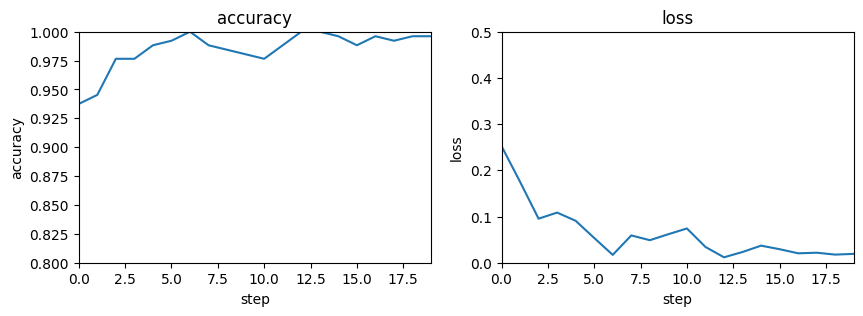

In [ ]:
class NeuralNet(Model):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = layers.Dense(n_hidden[0], activation=tf.nn.relu)
        self.fc2 = layers.Dense(n_hidden[1], activation=tf.nn.relu)
        self.fc3 = layers.Dense(n_hidden[2], activation=tf.nn.relu)
        self.out = layers.Dense(num_classes)

    def call(self, x, is_training=False):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.out(x)
        if not is_training:
            x = tf.nn.softmax(x)
        return x

neural_net = NeuralNet()

# Optimization process.
def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = neural_net(x, is_training=True)
        loss = cross_entropy_loss(pred, y)
        trainable_variables = neural_net.trainable_variables
        gradients = g.gradient(loss, trainable_variables)
        optimizer.apply_gradients(zip(gradients, trainable_variables))


# Accuracy metric.
def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)


optimizer = tf.keras.optimizers.Adagrad(learning_rate)
acc_arr = np.zeros(20)
loss_arr = np.zeros(20)

i=0
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    run_optimization(batch_x, batch_y)
    if step % display_step == 0:
        pred = neural_net(batch_x, is_training=True)
        loss = cross_entropy_loss(pred, batch_y)
        acc = accuracy(pred, batch_y)
        acc_arr[i] = acc.numpy()
        loss_arr[i] = loss.numpy()
        i+=1
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

pred = neural_net(x_test, is_training=False)
print("Test Accuracy: %f" % accuracy(pred, y_test))

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(acc_arr)
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('step')
plt.xlim([0,19])
plt.ylim([0.8,1])

plt.subplot(1,2,2)
plt.plot(loss_arr)
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('step')
plt.xlim([0,19])
plt.ylim([0,0.5])
plt.show()

plt.show()

#### tweaking the learning rate for the best optimizer

In [ ]:
lr = 0.01

step: 100, loss: 1.102039, accuracy: 0.710938
step: 200, loss: 0.568616, accuracy: 0.832031
step: 300, loss: 0.402220, accuracy: 0.878906
step: 400, loss: 0.385128, accuracy: 0.886719
step: 500, loss: 0.278678, accuracy: 0.921875
step: 600, loss: 0.263926, accuracy: 0.914062
step: 700, loss: 0.254992, accuracy: 0.933594
step: 800, loss: 0.246351, accuracy: 0.937500
step: 900, loss: 0.231407, accuracy: 0.921875
step: 1000, loss: 0.246041, accuracy: 0.945312
step: 1100, loss: 0.293271, accuracy: 0.914062
step: 1200, loss: 0.230169, accuracy: 0.921875
step: 1300, loss: 0.199050, accuracy: 0.937500
step: 1400, loss: 0.204217, accuracy: 0.960938
step: 1500, loss: 0.245320, accuracy: 0.933594
step: 1600, loss: 0.179694, accuracy: 0.960938
step: 1700, loss: 0.192861, accuracy: 0.937500
step: 1800, loss: 0.130827, accuracy: 0.964844
step: 1900, loss: 0.184285, accuracy: 0.945312
step: 2000, loss: 0.184597, accuracy: 0.937500
Test Accuracy: 0.939900


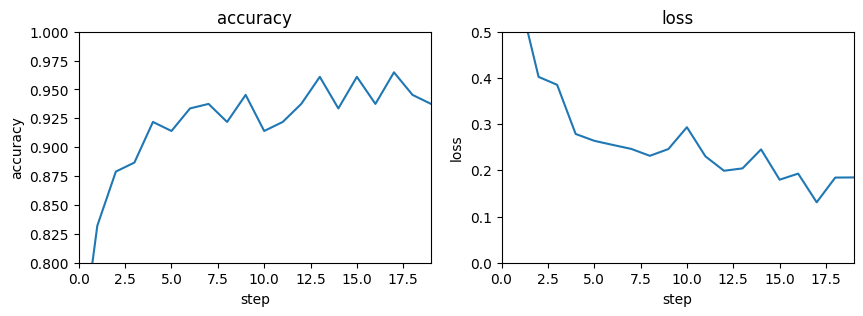

In [ ]:
class NeuralNet(Model):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = layers.Dense(n_hidden[0], activation=tf.nn.relu)
        self.fc2 = layers.Dense(n_hidden[1], activation=tf.nn.relu)
        self.fc3 = layers.Dense(n_hidden[2], activation=tf.nn.relu)
        self.out = layers.Dense(num_classes)

    def call(self, x, is_training=False):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.out(x)
        if not is_training:
            x = tf.nn.softmax(x)
        return x

neural_net = NeuralNet()

# Optimization process.
def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = neural_net(x, is_training=True)
        loss = cross_entropy_loss(pred, y)
        trainable_variables = neural_net.trainable_variables
        gradients = g.gradient(loss, trainable_variables)
        optimizer.apply_gradients(zip(gradients, trainable_variables))


# Accuracy metric.
def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)


optimizer = tf.keras.optimizers.Adagrad(lr)
acc_arr = np.zeros(20)
loss_arr = np.zeros(20)

i=0
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    run_optimization(batch_x, batch_y)
    if step % display_step == 0:
        pred = neural_net(batch_x, is_training=True)
        loss = cross_entropy_loss(pred, batch_y)
        acc = accuracy(pred, batch_y)
        acc_arr[i] = acc.numpy()
        loss_arr[i] = loss.numpy()
        i+=1
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

pred = neural_net(x_test, is_training=False)
print("Test Accuracy: %f" % accuracy(pred, y_test))

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(acc_arr)
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('step')
plt.xlim([0,19])
plt.ylim([0.8,1])

plt.subplot(1,2,2)
plt.plot(loss_arr)
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('step')
plt.xlim([0,19])
plt.ylim([0,0.5])
plt.show()

plt.show()

### Adam

step: 100, loss: 2.017767, accuracy: 0.218750
step: 200, loss: 2.062017, accuracy: 0.195312
step: 300, loss: 2.051971, accuracy: 0.167969
step: 400, loss: 2.020105, accuracy: 0.203125
step: 500, loss: 2.013283, accuracy: 0.226562
step: 600, loss: 1.975362, accuracy: 0.199219
step: 700, loss: 1.992337, accuracy: 0.214844
step: 800, loss: 1.924690, accuracy: 0.269531
step: 900, loss: 1.990183, accuracy: 0.250000
step: 1000, loss: 1.969075, accuracy: 0.222656
step: 1100, loss: 2.031276, accuracy: 0.203125
step: 1200, loss: 1.707252, accuracy: 0.269531
step: 1300, loss: 1.750712, accuracy: 0.253906
step: 1400, loss: 1.654333, accuracy: 0.328125
step: 1500, loss: 1.755493, accuracy: 0.250000
step: 1600, loss: 1.699281, accuracy: 0.304688
step: 1700, loss: 2.045863, accuracy: 0.253906
step: 1800, loss: 2.031275, accuracy: 0.148438
step: 1900, loss: 2.101631, accuracy: 0.203125
step: 2000, loss: 2.059946, accuracy: 0.191406
Test Accuracy: 0.203500


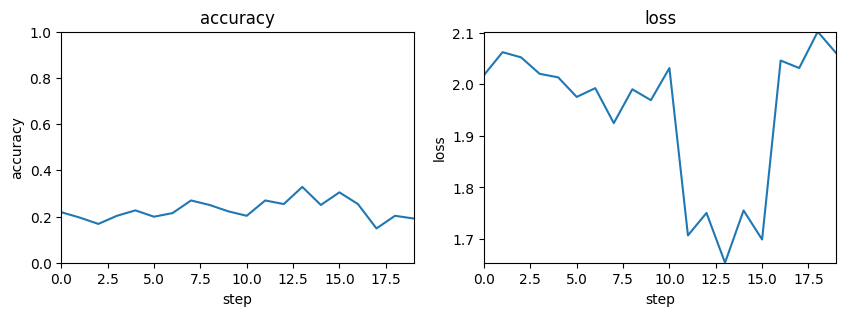

In [ ]:
class NeuralNet(Model):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = layers.Dense(n_hidden[0], activation=tf.nn.relu)
        self.fc2 = layers.Dense(n_hidden[1], activation=tf.nn.relu)
        self.fc3 = layers.Dense(n_hidden[2], activation=tf.nn.relu)
        self.out = layers.Dense(num_classes)

    def call(self, x, is_training=False):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.out(x)
        if not is_training:
            x = tf.nn.softmax(x)
        return x

        
neural_net = NeuralNet()

# Optimization process.
def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = neural_net(x, is_training=True)
        loss = cross_entropy_loss(pred, y)
        trainable_variables = neural_net.trainable_variables
        gradients = g.gradient(loss, trainable_variables)
        optimizer.apply_gradients(zip(gradients, trainable_variables))


# Accuracy metric.
def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)


optimizer = tf.keras.optimizers.Adam(learning_rate)
acc_arr = np.zeros(20)
loss_arr = np.zeros(20)

i=0
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    run_optimization(batch_x, batch_y)
    if step % display_step == 0:
        pred = neural_net(batch_x, is_training=True)
        loss = cross_entropy_loss(pred, batch_y)
        acc = accuracy(pred, batch_y)
        acc_arr[i] = acc.numpy()
        loss_arr[i] = loss.numpy()
        i+=1
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))


pred = neural_net(x_test, is_training=False)
print("Test Accuracy: %f" % accuracy(pred, y_test))


plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(acc_arr)
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('step')
plt.xlim([0,19])
plt.ylim([0,1])

plt.subplot(1,2,2)
plt.plot(loss_arr)
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('step')
plt.xlim([0,19])
plt.ylim([loss_arr.min(),loss_arr.max()])
plt.show()

plt.show()

## 256, 512, 1024

In [ ]:
n_hidden = [256, 512, 1024]

### Stochastic Gradient Descent

In [ ]:
class NeuralNet(Model):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = layers.Dense(n_hidden[0], activation=tf.nn.relu)
        self.fc2 = layers.Dense(n_hidden[1], activation=tf.nn.relu)
        self.fc3 = layers.Dense(n_hidden[2], activation=tf.nn.relu)
        self.out = layers.Dense(num_classes)

    def call(self, x, is_training=False):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.out(x)
        if not is_training:
            x = tf.nn.softmax(x)
        return x

neural_net = NeuralNet()

# Optimization process.
def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = neural_net(x, is_training=True)
        loss = cross_entropy_loss(pred, y)
        trainable_variables = neural_net.trainable_variables
        gradients = g.gradient(loss, trainable_variables)
        optimizer.apply_gradients(zip(gradients, trainable_variables))


# Accuracy metric.
def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)

step: 100, loss: 0.318870, accuracy: 0.929688
step: 200, loss: 0.255765, accuracy: 0.921875
step: 300, loss: 0.180979, accuracy: 0.945312
step: 400, loss: 0.142190, accuracy: 0.960938
step: 500, loss: 0.155271, accuracy: 0.953125
step: 600, loss: 0.179416, accuracy: 0.960938
step: 700, loss: 0.098313, accuracy: 0.972656
step: 800, loss: 0.090681, accuracy: 0.980469
step: 900, loss: 0.126406, accuracy: 0.964844
step: 1000, loss: 0.068855, accuracy: 0.980469
step: 1100, loss: 0.128241, accuracy: 0.960938
step: 1200, loss: 0.056292, accuracy: 0.992188
step: 1300, loss: 0.066857, accuracy: 0.988281
step: 1400, loss: 0.042465, accuracy: 0.992188
step: 1500, loss: 0.062815, accuracy: 0.980469
step: 1600, loss: 0.032093, accuracy: 0.996094
step: 1700, loss: 0.056795, accuracy: 0.984375
step: 1800, loss: 0.054492, accuracy: 0.988281
step: 1900, loss: 0.061730, accuracy: 0.984375
step: 2000, loss: 0.082945, accuracy: 0.992188


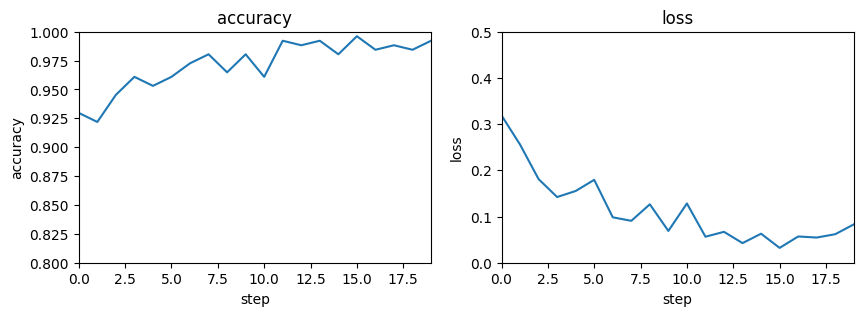

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate)
acc_arr = np.zeros(20)
loss_arr = np.zeros(20)

i=0
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    run_optimization(batch_x, batch_y)
    if step % display_step == 0:
        pred = neural_net(batch_x, is_training=True)
        loss = cross_entropy_loss(pred, batch_y)
        acc = accuracy(pred, batch_y)
        acc_arr[i] = acc.numpy()
        loss_arr[i] = loss.numpy()
        i+=1
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(acc_arr)
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('step')
plt.xlim([0,19])
plt.ylim([0.8,1])

plt.subplot(1,2,2)
plt.plot(loss_arr)
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('step')
plt.xlim([0,19])
plt.ylim([0,0.5])
plt.show()

plt.show()

In [ ]:
pred = neural_net(x_test, is_training=False)
print("Test Accuracy: %f" % accuracy(pred, y_test))

Test Accuracy: 0.971200


In [ ]:
neural_net.summary()

Model: "neural_net_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_94 (Dense)            multiple                  200960    
                                                                 
 dense_95 (Dense)            multiple                  131584    
                                                                 
 dense_96 (Dense)            multiple                  525312    
                                                                 
 dense_97 (Dense)            multiple                  10250     
                                                                 
Total params: 868,106
Trainable params: 868,106
Non-trainable params: 0
_________________________________________________________________


### Adagrad

In [ ]:
class NeuralNet(Model):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = layers.Dense(n_hidden[0], activation=tf.nn.relu)
        self.fc2 = layers.Dense(n_hidden[1], activation=tf.nn.relu)
        self.fc3 = layers.Dense(n_hidden[2], activation=tf.nn.relu)
        self.out = layers.Dense(num_classes)

    def call(self, x, is_training=False):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.out(x)
        if not is_training:
            x = tf.nn.softmax(x)
        return x

neural_net = NeuralNet()

# Optimization process.
def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = neural_net(x, is_training=True)
        loss = cross_entropy_loss(pred, y)
        trainable_variables = neural_net.trainable_variables
        gradients = g.gradient(loss, trainable_variables)
        optimizer.apply_gradients(zip(gradients, trainable_variables))


# Accuracy metric.
def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)

step: 100, loss: 0.234060, accuracy: 0.929688
step: 200, loss: 0.136324, accuracy: 0.949219
step: 300, loss: 0.056595, accuracy: 0.988281
step: 400, loss: 0.072946, accuracy: 0.984375
step: 500, loss: 0.075223, accuracy: 0.980469
step: 600, loss: 0.076268, accuracy: 0.976562
step: 700, loss: 0.035126, accuracy: 0.992188
step: 800, loss: 0.043318, accuracy: 0.992188
step: 900, loss: 0.026115, accuracy: 0.996094
step: 1000, loss: 0.025036, accuracy: 0.996094
step: 1100, loss: 0.033246, accuracy: 0.996094
step: 1200, loss: 0.034194, accuracy: 0.992188
step: 1300, loss: 0.009392, accuracy: 1.000000
step: 1400, loss: 0.011915, accuracy: 1.000000
step: 1500, loss: 0.021761, accuracy: 0.996094
step: 1600, loss: 0.007218, accuracy: 1.000000
step: 1700, loss: 0.006646, accuracy: 1.000000
step: 1800, loss: 0.004986, accuracy: 1.000000
step: 1900, loss: 0.060989, accuracy: 0.988281
step: 2000, loss: 0.039540, accuracy: 0.996094


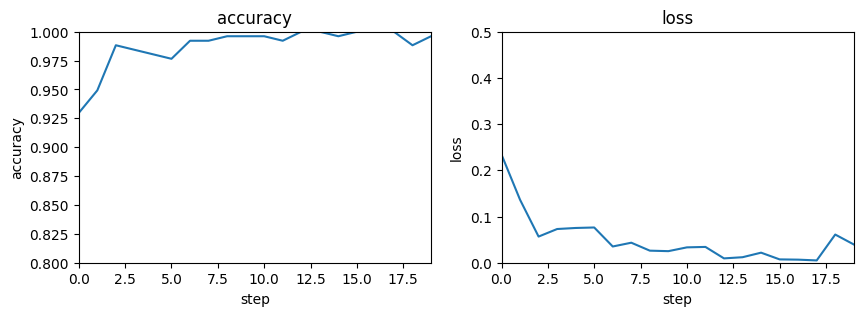

In [ ]:
optimizer = tf.keras.optimizers.Adagrad(learning_rate)
acc_arr = np.zeros(20)
loss_arr = np.zeros(20)

i=0
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    run_optimization(batch_x, batch_y)
    if step % display_step == 0:
        pred = neural_net(batch_x, is_training=True)
        loss = cross_entropy_loss(pred, batch_y)
        acc = accuracy(pred, batch_y)
        acc_arr[i] = acc.numpy()
        loss_arr[i] = loss.numpy()
        i+=1
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))


plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(acc_arr)
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('step')
plt.xlim([0,19])
plt.ylim([0.8,1])

plt.subplot(1,2,2)
plt.plot(loss_arr)
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('step')
plt.xlim([0,19])
plt.ylim([0,0.5])
plt.show()

plt.show()

In [ ]:
pred = neural_net(x_test, is_training=False)
print("Test Accuracy: %f" % accuracy(pred, y_test))

Test Accuracy: 0.968300


### Adam

In [ ]:
class NeuralNet(Model):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = layers.Dense(n_hidden[0], activation=tf.nn.relu)
        self.fc2 = layers.Dense(n_hidden[1], activation=tf.nn.relu)
        self.fc3 = layers.Dense(n_hidden[2], activation=tf.nn.relu)
        self.out = layers.Dense(num_classes)

    def call(self, x, is_training=False):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.out(x)
        if not is_training:
            x = tf.nn.softmax(x)
        return x

        
neural_net = NeuralNet()

# Optimization process.
def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = neural_net(x, is_training=True)
        loss = cross_entropy_loss(pred, y)
        trainable_variables = neural_net.trainable_variables
        gradients = g.gradient(loss, trainable_variables)
        optimizer.apply_gradients(zip(gradients, trainable_variables))


# Accuracy metric.
def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)

step: 100, loss: 2.291502, accuracy: 0.152344
step: 200, loss: 2.131896, accuracy: 0.203125
step: 300, loss: 1.765193, accuracy: 0.359375
step: 400, loss: 1.921713, accuracy: 0.320312
step: 500, loss: 1.695133, accuracy: 0.363281
step: 600, loss: 1.595225, accuracy: 0.289062
step: 700, loss: 1.556577, accuracy: 0.355469
step: 800, loss: 1.456741, accuracy: 0.394531
step: 900, loss: 1.396331, accuracy: 0.402344
step: 1000, loss: 1.477293, accuracy: 0.367188
step: 1100, loss: 1.486352, accuracy: 0.347656
step: 1200, loss: 1.440660, accuracy: 0.375000
step: 1300, loss: 1.370325, accuracy: 0.371094
step: 1400, loss: 1.523499, accuracy: 0.355469
step: 1500, loss: 1.474936, accuracy: 0.417969
step: 1600, loss: 1.474493, accuracy: 0.367188
step: 1700, loss: 1.468441, accuracy: 0.363281
step: 1800, loss: 1.469460, accuracy: 0.375000
step: 1900, loss: 1.483651, accuracy: 0.371094
step: 2000, loss: 1.495553, accuracy: 0.410156


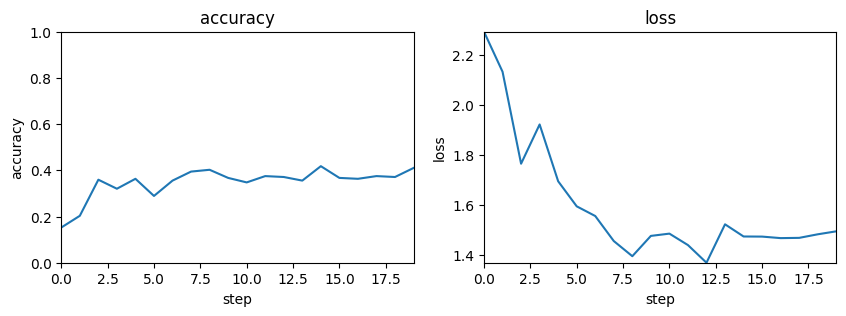

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate)
acc_arr = np.zeros(20)
loss_arr = np.zeros(20)

i=0
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    run_optimization(batch_x, batch_y)
    if step % display_step == 0:
        pred = neural_net(batch_x, is_training=True)
        loss = cross_entropy_loss(pred, batch_y)
        acc = accuracy(pred, batch_y)
        acc_arr[i] = acc.numpy()
        loss_arr[i] = loss.numpy()
        i+=1
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(acc_arr)
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('step')
plt.xlim([0,19])
plt.ylim([0,1])

plt.subplot(1,2,2)
plt.plot(loss_arr)
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('step')
plt.xlim([0,19])
plt.ylim([loss_arr.min(),loss_arr.max()])
plt.show()

plt.show()

In [ ]:
pred = neural_net(x_test, is_training=False)
print("Test Accuracy: %f" % accuracy(pred, y_test))

Test Accuracy: 0.383500


## 512, 2046, 1024

In [ ]:
n_hidden = [512, 2046, 1024]

### Stochastic Gradient Descent

step: 100, loss: 0.325576, accuracy: 0.914062
step: 200, loss: 0.201540, accuracy: 0.957031
step: 300, loss: 0.232647, accuracy: 0.929688
step: 400, loss: 0.154377, accuracy: 0.957031
step: 500, loss: 0.154452, accuracy: 0.964844
step: 600, loss: 0.140402, accuracy: 0.957031
step: 700, loss: 0.078192, accuracy: 0.988281
step: 800, loss: 0.091810, accuracy: 0.972656
step: 900, loss: 0.062298, accuracy: 0.988281
step: 1000, loss: 0.098374, accuracy: 0.972656
step: 1100, loss: 0.105927, accuracy: 0.960938
step: 1200, loss: 0.093798, accuracy: 0.976562
step: 1300, loss: 0.122641, accuracy: 0.972656
step: 1400, loss: 0.043787, accuracy: 0.996094
step: 1500, loss: 0.052863, accuracy: 0.992188
step: 1600, loss: 0.042202, accuracy: 0.992188
step: 1700, loss: 0.036340, accuracy: 0.992188
step: 1800, loss: 0.066866, accuracy: 0.980469
step: 1900, loss: 0.018500, accuracy: 1.000000
step: 2000, loss: 0.032206, accuracy: 0.996094
Test Accuracy: 0.971800


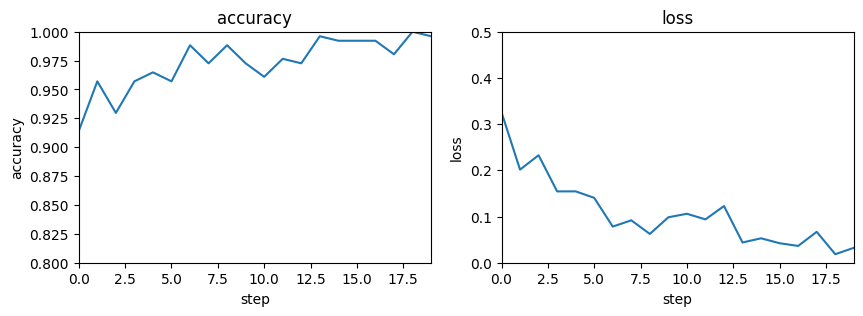

In [ ]:
class NeuralNet(Model):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = layers.Dense(n_hidden[0], activation=tf.nn.relu)
        self.fc2 = layers.Dense(n_hidden[1], activation=tf.nn.relu)
        self.fc3 = layers.Dense(n_hidden[2], activation=tf.nn.relu)
        self.out = layers.Dense(num_classes)

    def call(self, x, is_training=False):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.out(x)
        if not is_training:
            x = tf.nn.softmax(x)
        return x

neural_net = NeuralNet()

# Optimization process.
def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = neural_net(x, is_training=True)
        loss = cross_entropy_loss(pred, y)
        trainable_variables = neural_net.trainable_variables
        gradients = g.gradient(loss, trainable_variables)
        optimizer.apply_gradients(zip(gradients, trainable_variables))


# Accuracy metric.
def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)

optimizer = tf.keras.optimizers.SGD(learning_rate)
acc_arr = np.zeros(20)
loss_arr = np.zeros(20)

i=0
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    run_optimization(batch_x, batch_y)
    if step % display_step == 0:
        pred = neural_net(batch_x, is_training=True)
        loss = cross_entropy_loss(pred, batch_y)
        acc = accuracy(pred, batch_y)
        acc_arr[i] = acc.numpy()
        loss_arr[i] = loss.numpy()
        i+=1
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

pred = neural_net(x_test, is_training=False)
print("Test Accuracy: %f" % accuracy(pred, y_test))


plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(acc_arr)
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('step')
plt.xlim([0,19])
plt.ylim([0.8,1])

plt.subplot(1,2,2)
plt.plot(loss_arr)
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('step')
plt.xlim([0,19])
plt.ylim([0,0.5])
plt.show()

plt.show()

### Adagrad

step: 100, loss: 0.167421, accuracy: 0.957031
step: 200, loss: 0.118519, accuracy: 0.968750
step: 300, loss: 0.058381, accuracy: 0.988281
step: 400, loss: 0.058133, accuracy: 0.984375
step: 500, loss: 0.093862, accuracy: 0.972656
step: 600, loss: 0.038237, accuracy: 0.992188
step: 700, loss: 0.023448, accuracy: 1.000000
step: 800, loss: 0.030486, accuracy: 0.996094
step: 900, loss: 0.021156, accuracy: 1.000000
step: 1000, loss: 0.018832, accuracy: 0.996094
step: 1100, loss: 0.024281, accuracy: 1.000000
step: 1200, loss: 0.008010, accuracy: 1.000000
step: 1300, loss: 0.011460, accuracy: 0.996094
step: 1400, loss: 0.006997, accuracy: 1.000000
step: 1500, loss: 0.009110, accuracy: 0.996094
step: 1600, loss: 0.011881, accuracy: 0.996094
step: 1700, loss: 0.002450, accuracy: 1.000000
step: 1800, loss: 0.009384, accuracy: 1.000000
step: 1900, loss: 0.005739, accuracy: 1.000000
step: 2000, loss: 0.132066, accuracy: 0.964844
Test Accuracy: 0.951200


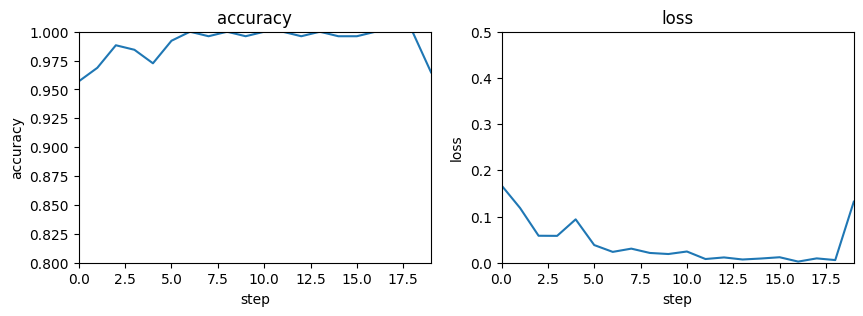

In [ ]:
class NeuralNet(Model):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = layers.Dense(n_hidden[0], activation=tf.nn.relu)
        self.fc2 = layers.Dense(n_hidden[1], activation=tf.nn.relu)
        self.fc3 = layers.Dense(n_hidden[2], activation=tf.nn.relu)
        self.out = layers.Dense(num_classes)

    def call(self, x, is_training=False):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.out(x)
        if not is_training:
            x = tf.nn.softmax(x)
        return x

neural_net = NeuralNet()

# Optimization process.
def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = neural_net(x, is_training=True)
        loss = cross_entropy_loss(pred, y)
        trainable_variables = neural_net.trainable_variables
        gradients = g.gradient(loss, trainable_variables)
        optimizer.apply_gradients(zip(gradients, trainable_variables))


# Accuracy metric.
def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)


optimizer = tf.keras.optimizers.Adagrad(learning_rate)
acc_arr = np.zeros(20)
loss_arr = np.zeros(20)

i=0
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    run_optimization(batch_x, batch_y)
    if step % display_step == 0:
        pred = neural_net(batch_x, is_training=True)
        loss = cross_entropy_loss(pred, batch_y)
        acc = accuracy(pred, batch_y)
        acc_arr[i] = acc.numpy()
        loss_arr[i] = loss.numpy()
        i+=1
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

pred = neural_net(x_test, is_training=False)
print("Test Accuracy: %f" % accuracy(pred, y_test))

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(acc_arr)
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('step')
plt.xlim([0,19])
plt.ylim([0.8,1])

plt.subplot(1,2,2)
plt.plot(loss_arr)
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('step')
plt.xlim([0,19])
plt.ylim([0,0.5])
plt.show()

plt.show()

### Adam

step: 100, loss: 2.297479, accuracy: 0.109375
step: 200, loss: 2.346068, accuracy: 0.085938
step: 300, loss: 2.304381, accuracy: 0.121094
step: 400, loss: 2.295623, accuracy: 0.128906
step: 500, loss: 2.304956, accuracy: 0.093750
step: 600, loss: 2.302217, accuracy: 0.113281
step: 700, loss: 2.306605, accuracy: 0.078125
step: 800, loss: 2.287312, accuracy: 0.148438
step: 900, loss: 2.316838, accuracy: 0.054688
step: 1000, loss: 2.291286, accuracy: 0.167969
step: 1100, loss: 2.296649, accuracy: 0.148438
step: 1200, loss: 2.309560, accuracy: 0.101562
step: 1300, loss: 2.315580, accuracy: 0.101562
step: 1400, loss: 2.305642, accuracy: 0.093750
step: 1500, loss: 2.317614, accuracy: 0.097656
step: 1600, loss: 2.299806, accuracy: 0.113281
step: 1700, loss: 2.297333, accuracy: 0.125000
step: 1800, loss: 2.297962, accuracy: 0.132812
step: 1900, loss: 2.293171, accuracy: 0.140625
step: 2000, loss: 2.306427, accuracy: 0.113281
Test Accuracy: 0.113500


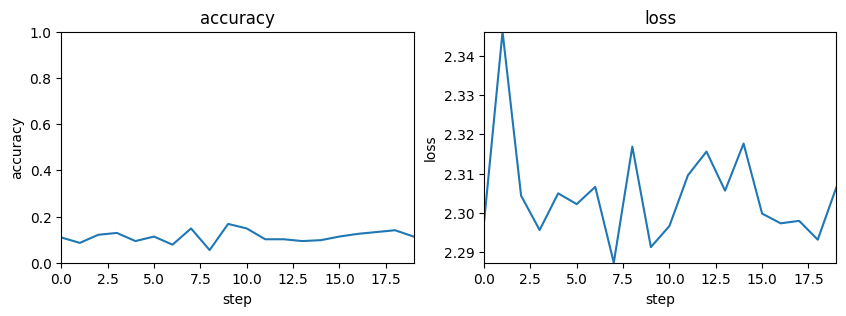

In [ ]:
class NeuralNet(Model):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = layers.Dense(n_hidden[0], activation=tf.nn.relu)
        self.fc2 = layers.Dense(n_hidden[1], activation=tf.nn.relu)
        self.fc3 = layers.Dense(n_hidden[2], activation=tf.nn.relu)
        self.out = layers.Dense(num_classes)

    def call(self, x, is_training=False):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.out(x)
        if not is_training:
            x = tf.nn.softmax(x)
        return x

        
neural_net = NeuralNet()

# Optimization process.
def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = neural_net(x, is_training=True)
        loss = cross_entropy_loss(pred, y)
        trainable_variables = neural_net.trainable_variables
        gradients = g.gradient(loss, trainable_variables)
        optimizer.apply_gradients(zip(gradients, trainable_variables))


# Accuracy metric.
def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)


optimizer = tf.keras.optimizers.Adam(learning_rate)
acc_arr = np.zeros(20)
loss_arr = np.zeros(20)

i=0
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    run_optimization(batch_x, batch_y)
    if step % display_step == 0:
        pred = neural_net(batch_x, is_training=True)
        loss = cross_entropy_loss(pred, batch_y)
        acc = accuracy(pred, batch_y)
        acc_arr[i] = acc.numpy()
        loss_arr[i] = loss.numpy()
        i+=1
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))


pred = neural_net(x_test, is_training=False)
print("Test Accuracy: %f" % accuracy(pred, y_test))


plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(acc_arr)
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('step')
plt.xlim([0,19])
plt.ylim([0,1])

plt.subplot(1,2,2)
plt.plot(loss_arr)
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('step')
plt.xlim([0,19])
plt.ylim([loss_arr.min(),loss_arr.max()])
plt.show()

plt.show()

In [ ]:
neural_net.summary()

Model: "neural_net_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_74 (Dense)            multiple                  401920    
                                                                 
 dense_75 (Dense)            multiple                  1049598   
                                                                 
 dense_76 (Dense)            multiple                  2096128   
                                                                 
 dense_77 (Dense)            multiple                  10250     
                                                                 
Total params: 3,557,896
Trainable params: 3,557,896
Non-trainable params: 0
_________________________________________________________________


# Recall, Precision, ROC curve, Learning Curve

In [ ]:
n_hidden = [64, 128, 64]

class NeuralNet(Model):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = layers.Dense(n_hidden[0], activation=tf.nn.relu)
        self.fc2 = layers.Dense(n_hidden[1], activation=tf.nn.relu)
        self.fc3 = layers.Dense(n_hidden[2], activation=tf.nn.relu)
        self.out = layers.Dense(num_classes)

    def call(self, x, is_training=False):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.out(x)
        if not is_training:
            x = tf.nn.softmax(x)
        return x

neural_net = NeuralNet()

# Optimization process.
def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = neural_net(x, is_training=True)
        loss = cross_entropy_loss(pred, y)
        trainable_variables = neural_net.trainable_variables
        gradients = g.gradient(loss, trainable_variables)
        optimizer.apply_gradients(zip(gradients, trainable_variables))


# Accuracy metric.
def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)


optimizer = tf.keras.optimizers.Adagrad(learning_rate)
acc_arr = np.zeros(20)
loss_arr = np.zeros(20)

i=0
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    run_optimization(batch_x, batch_y)
    if step % display_step == 0:
        pred = neural_net(batch_x, is_training=True)
        loss = cross_entropy_loss(pred, batch_y)
        acc = accuracy(pred, batch_y)
        acc_arr[i] = acc.numpy()
        loss_arr[i] = loss.numpy()
        i+=1
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

pred = neural_net(x_test, is_training=False)
print("Test Accuracy: %f" % accuracy(pred, y_test))



step: 100, loss: 0.239246, accuracy: 0.937500
step: 200, loss: 0.208446, accuracy: 0.929688
step: 300, loss: 0.134089, accuracy: 0.960938
step: 400, loss: 0.121764, accuracy: 0.976562
step: 500, loss: 0.112143, accuracy: 0.972656
step: 600, loss: 0.113472, accuracy: 0.964844
step: 700, loss: 0.045336, accuracy: 0.992188
step: 800, loss: 0.078369, accuracy: 0.980469
step: 900, loss: 0.041511, accuracy: 0.992188
step: 1000, loss: 0.028505, accuracy: 0.996094
step: 1100, loss: 0.049473, accuracy: 0.992188
step: 1200, loss: 0.024639, accuracy: 0.992188
step: 1300, loss: 0.018168, accuracy: 0.996094
step: 1400, loss: 0.017821, accuracy: 1.000000
step: 1500, loss: 0.048324, accuracy: 0.988281
step: 1600, loss: 0.035828, accuracy: 0.996094
step: 1700, loss: 0.016972, accuracy: 0.996094
step: 1800, loss: 0.036845, accuracy: 0.988281
step: 1900, loss: 0.031683, accuracy: 0.996094
step: 2000, loss: 0.019054, accuracy: 1.000000
Test Accuracy: 0.974800


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from scipy import interp
from itertools import cycle

accuracy = accuracy_score(y_test, tf.argmax(pred, axis=1))
precision = precision_score(y_test, tf.argmax(pred, axis=1), average='weighted')
recall = recall_score(y_test, tf.argmax(pred, axis=1), average='weighted')

In [ ]:
print('accuracy = ',accuracy)
print('precision = ',precision)
print('recall = ',recall)

accuracy =  0.9699
precision =  0.9701289568362584
recall =  0.9699


In [ ]:
y_t = tf.one_hot(y_test, depth=10)
y_pr =  tf.one_hot(tf.argmax(pred, axis=1), depth=10)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_t[:, i], y_pr[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])  

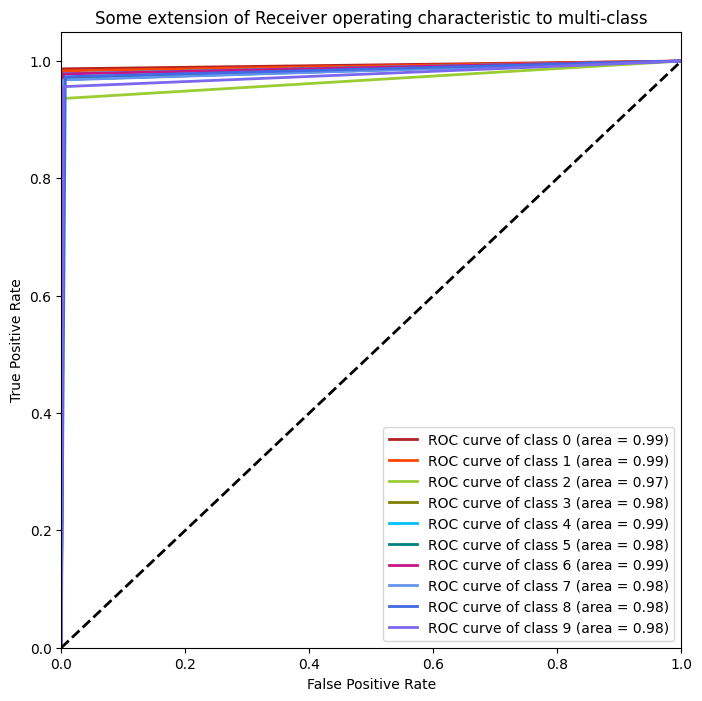

In [ ]:
plt.figure(figsize=(8,8))

colors = cycle(['firebrick', 'orangered', 'yellowgreen','olive','deepskyblue', 'teal', 'mediumvioletred', 'cornflowerblue', 'royalblue','mediumslateblue'])
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

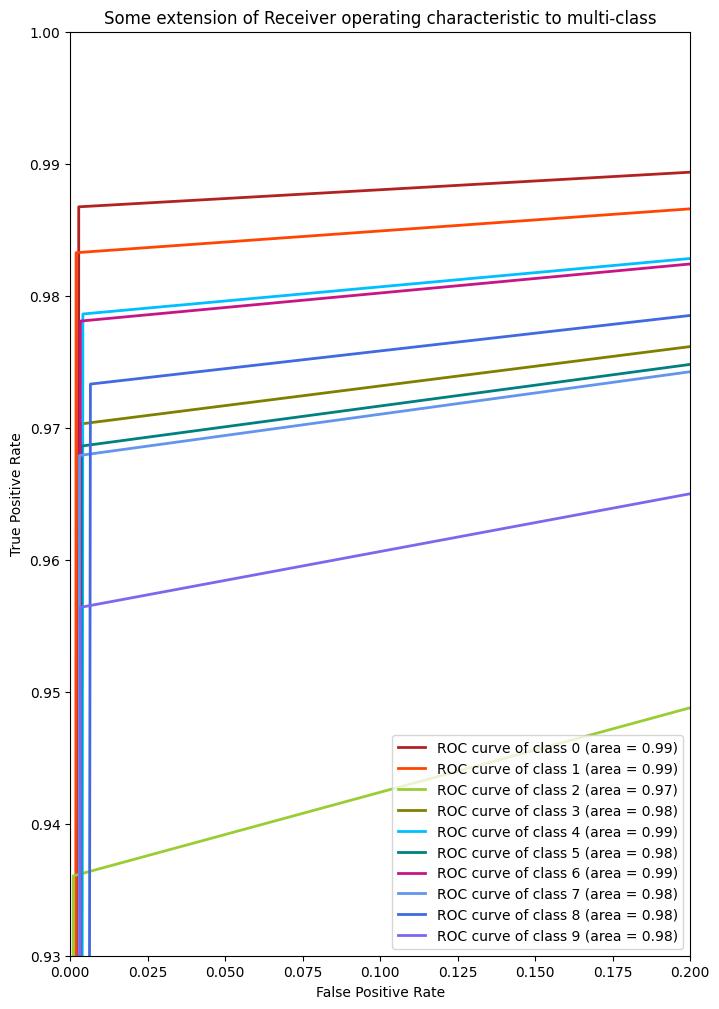

In [ ]:
# Zoom in view of the upper left corner.
plt.figure(figsize=(8,12))
plt.xlim(0, 0.2)
plt.ylim(0.93, 1)


colors = cycle(['firebrick', 'orangered', 'yellowgreen','olive','deepskyblue', 'teal', 'mediumvioletred', 'cornflowerblue', 'royalblue','mediumslateblue'])
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# Part 2

In [149]:
(org_x_train, org_y_train), (org_x_test, org_y_test) = mnist.load_data()
org_x_train, org_x_test = np.array(org_x_train, np.float32), np.array(org_x_test, np.float32)
org_x_train, org_x_test = org_x_train.reshape([-1, num_features]), org_x_test.reshape([-1, num_features])
org_x_train, org_x_test = org_x_train / 255., org_x_test / 255.

In [151]:
train_filter_arr_1 = org_y_train < 5

new_x_train_1 = org_x_train[train_filter_arr_1]
new_y_train_1 = org_y_train[train_filter_arr_1]


train_filter_arr_2 = org_y_test < 5

new_x_train_2 = org_x_test[train_filter_arr_2]
new_y_train_2 = org_y_test[train_filter_arr_2]

In [157]:
test_filter_arr_1 = org_y_train >= 5

new_x_test_1 = org_x_train[test_filter_arr_1]
new_y_test_1 = org_y_train[test_filter_arr_1]


test_filter_arr_2 = org_y_test >= 5

new_x_test_2 = org_x_test[test_filter_arr_2]
new_y_test_2 = org_y_test[test_filter_arr_2]

In [162]:
train_data_1 = tf.data.Dataset.from_tensor_slices((new_x_test_1, new_y_test_1))
train_data_1 = train_data_1.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [163]:
train_data_2 = tf.data.Dataset.from_tensor_slices((new_x_test_2, new_y_test_2))
train_data_2 = train_data_2.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [172]:
n_hidden = [64, 128, 64]

class NeuralNet(Model):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = layers.Dense(n_hidden[0], activation=tf.nn.relu)
        self.fc2 = layers.Dense(n_hidden[1], activation=tf.nn.relu)
        self.fc3 = layers.Dense(n_hidden[2], activation=tf.nn.relu)
        self.out = layers.Dense(num_classes)

    def call(self, x, is_training=False):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.out(x)
        if not is_training:
            x = tf.nn.softmax(x)
        return x

neural_net = NeuralNet()

# Optimization process.
def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = neural_net(x, is_training=True)
        loss = cross_entropy_loss(pred, y)
        trainable_variables = neural_net.trainable_variables
        gradients = g.gradient(loss, trainable_variables)
        optimizer.apply_gradients(zip(gradients, trainable_variables))


# Accuracy metric.
def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)






In [173]:
optimizer = tf.keras.optimizers.Adagrad(learning_rate)
acc_arr = np.zeros(40)
loss_arr = np.zeros(40)

i=0
for step, (batch_x, batch_y) in enumerate(train_data_1.take(training_steps), 1):
    run_optimization(batch_x, batch_y)
    if step % display_step == 0:
        pred = neural_net(batch_x, is_training=True)
        loss = cross_entropy_loss(pred, batch_y)
        acc = accuracy(pred, batch_y)
        acc_arr[i] = acc.numpy()
        loss_arr[i] = loss.numpy()
        i+=1
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

pred = neural_net(new_x_test_1, is_training=False)
print("Test Accuracy: %f" % accuracy(pred, new_y_test_1))

for step, (batch_x, batch_y) in enumerate(train_data_2.take(training_steps), 1):
    run_optimization(batch_x, batch_y)
    if step % display_step == 0:
        pred = neural_net(batch_x, is_training=True)
        loss = cross_entropy_loss(pred, batch_y)
        acc = accuracy(pred, batch_y)
        acc_arr[i] = acc.numpy()
        loss_arr[i] = loss.numpy()
        i+=1
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

pred = neural_net(new_x_test_2, is_training=False)
print("Test Accuracy: %f" % accuracy(pred, new_y_test_2))

step: 100, loss: 0.136546, accuracy: 0.957031
step: 200, loss: 0.070246, accuracy: 0.984375
step: 300, loss: 0.049124, accuracy: 0.988281
step: 400, loss: 0.043498, accuracy: 0.988281
step: 500, loss: 0.049941, accuracy: 0.980469
step: 600, loss: 0.027594, accuracy: 0.992188
step: 700, loss: 0.012264, accuracy: 1.000000
step: 800, loss: 0.015732, accuracy: 0.996094
step: 900, loss: 0.014742, accuracy: 0.992188
step: 1000, loss: 0.006533, accuracy: 1.000000
step: 1100, loss: 0.008079, accuracy: 1.000000
step: 1200, loss: 0.019691, accuracy: 0.996094
step: 1300, loss: 0.006434, accuracy: 1.000000
step: 1400, loss: 0.014784, accuracy: 0.996094
step: 1500, loss: 0.004592, accuracy: 1.000000
step: 1600, loss: 0.004007, accuracy: 1.000000
step: 1700, loss: 0.008493, accuracy: 1.000000
step: 1800, loss: 0.001191, accuracy: 1.000000
step: 1900, loss: 0.003103, accuracy: 1.000000
step: 2000, loss: 0.001666, accuracy: 1.000000
Test Accuracy: 0.999252
step: 100, loss: 0.058674, accuracy: 0.984375